# Working With Time Series in Pandas

## Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

    pip install vega_datasets
    
You can use this library like so:

    from vega_datasets import data
    
Call the sf_temps() dataset from the vega_datasets library like so:

    data.sf_temps()


## Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt

# vega datasets
from vega_datasets import data

### data.sf_temps()

In [2]:
temp_df = data.sf_temps()
temp_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


### Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index()
temp_df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [4]:
#get the daily mean
df_daily_temp = temp_df.resample('D').mean()
df_daily_temp.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


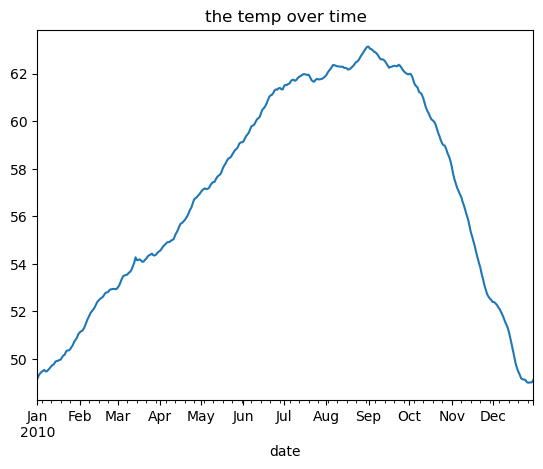

In [5]:
#line plot

df_daily_temp.temp.plot()

plt.title('the temp over time')
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

In [6]:
#get min
df_daily_min = temp_df.resample('D').agg(['min'])
df_daily_min

,temp
,min
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6


<Figure size 1400x1000 with 0 Axes>

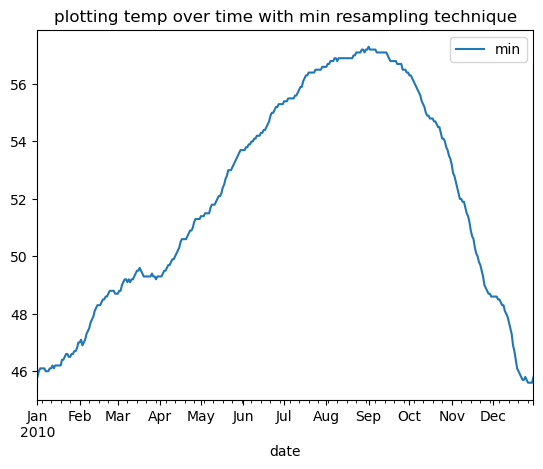

In [7]:
plt.figure(figsize=(14,10))

df_daily_min.temp.plot(label='daily')
# df_daily_min.resample('D').min().plot(label='min')


plt.title('plotting temp over time with min resampling technique')
plt.legend()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

In [8]:
#get min
df_daily_max = temp_df.resample('D').agg(['max'])
df_daily_max

,temp
,max
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2


<Figure size 1400x1000 with 0 Axes>

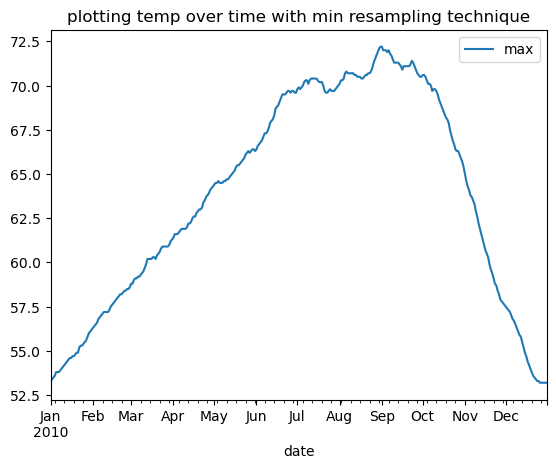

In [9]:
plt.figure(figsize=(14,10))

df_daily_max.temp.plot(label='daily')
# df_daily_min.resample('D').min().plot(label='min')


plt.title('plotting temp over time with min resampling technique')
plt.legend()
plt.show()

4. Which month is the coldest, on average?

In [10]:
temp_mo_df = temp_df.copy()

In [11]:
#pull out monthly name & save
temp_mo_df['month'] = temp_mo_df.index.month_name()

In [12]:
temp_mo_df.groupby('month').mean().idxmin()

temp    January
dtype: object

5. Which month has the highest average temperature?

In [13]:
temp_mo_df.groupby('month').mean().idxmax()

temp    September
dtype: object

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [14]:
temp_df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [15]:
#get min
df_daily_mm = temp_df.resample('D').agg(['min','max'])
df_daily_mm

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [16]:
#difference by one
df_daily_mm['diff'] = df_daily_mm.temp['max'] - df_daily_mm.temp['min']

In [17]:
#use num of months attribute
df_daily_mm.resample('M').max()['diff'].sort_values().tail(1)

date
2010-08-31    15.0
Name: diff, dtype: float64

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [18]:
#get min
df_daily = temp_df.resample('D').agg(['mean','min','max'])
df_daily

temp            
                 mean   min   max
date                             
2010-01-01  49.170833  45.8  53.3
2010-01-02  49.304167  46.0  53.4
2010-01-03  49.391667  46.1  53.5
2010-01-04  49.445833  46.1  53.6
2010-01-05  49.491667  46.1  53.8
...               ...   ...   ...
2010-12-27  48.991667  45.6  53.2
2010-12-28  49.000000  45.6  53.2
2010-12-29  49.012500  45.6  53.2
2010-12-30  49.012500  45.6  53.2
2010-12-31  49.116667  45.8  53.2

[365 rows x 3 columns]

<Figure size 1400x1000 with 0 Axes>

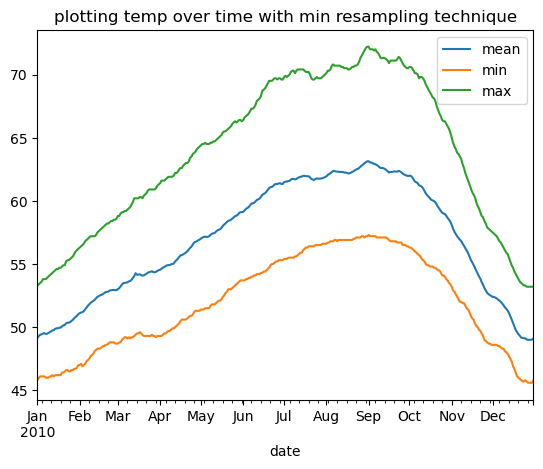

In [19]:
plt.figure(figsize=(14,10))

df_daily.temp.plot(label='daily')

plt.title('plotting temp over time with min resampling technique')
plt.legend()
plt.show()

### data.seattle_weather()

In [20]:
df_seattle = data.seattle_weather()

In [21]:
df_seattle = df_seattle.set_index('date')
df_seattle = df_seattle.sort_index()
df_seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


### Use the above dataset for the following exercises:

1. Which year and month combination has the highest amount of precipitation?

In [22]:
#get the month mean
df_monthly = df_seattle.resample('M').sum().precipitation.idxmax()
df_monthly

Timestamp('2015-12-31 00:00:00', freq='M')

In [23]:
df_seattle.resample('M').sum().precipitation.max()

284.5

2. Visualize the amount of monthly precipitation over time.

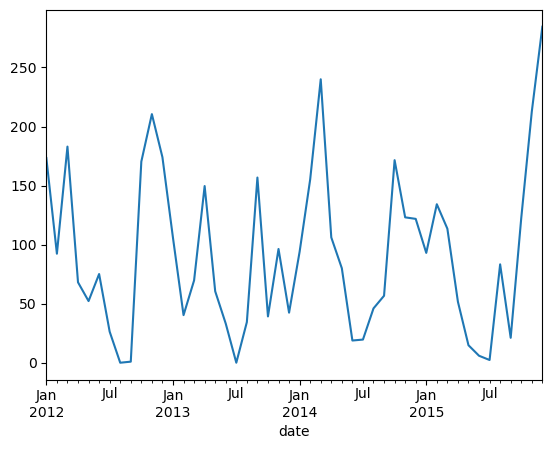

In [24]:
df_seattle.resample('M').sum().precipitation.plot();

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

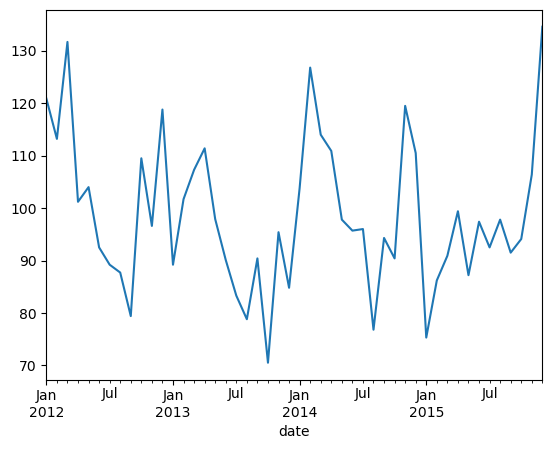

In [25]:
df_seattle.resample('M').sum().wind.plot();

4. Which year-month combination is the windiest?

In [26]:
df_seattle.resample('M').sum().wind.sort_values(ascending=False).head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [27]:
df_seattle[df_seattle.weather == 'sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

In [28]:
df_seattle[df_seattle.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [29]:
df_seattle[df_seattle.weather == 'sun'].resample('Y').count().weather.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

6. In which month does it rain the most?

In [30]:
df_seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [31]:
df_seattle.groupby(df_seattle.index.month_name()).sum().precipitation.idxmax()

'November'

7. Which month has the most number of days with a non-zero amount of precipitation?

In [32]:
df_seattle['month'] = df_seattle.index.month_name()

In [33]:
df_seattle[df_seattle.precipitation >0].groupby('month').count().weather.sort_values().tail(1)

month
December    81
Name: weather, dtype: int64

### data.flights_20k()

In [34]:
df = data.flights_20k()

In [35]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


### Use the above dataset for the following exercises:

1. Convert any negative delays to 0.

In [37]:
df = df.set_index('date')
df = df.sort_index()

In [38]:
df.delay = np.where(df.delay < 0, 0, df.delay)

2. Which hour of the day has the highest average delay?

In [39]:
df['hour'] = df.index.hour

In [40]:
df.groupby('hour').mean().delay.sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [41]:
df['weekday'] = df.index.day_name()

In [42]:
df.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [43]:
df['month'] = df.index.month_name()

In [44]:
df.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

## Bonus

### data.iowa_electricity()

In [45]:
data.iowa_electricity().head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
